In [ ]:
 Apnea-ECG Database
데이터는 70개 레코드로 구성되며, 35개 레코드(a01~a20, b01~b05, c01~c10)의  학습 세트 와 35개 레코드(x01~x35)의 테스트 세트

녹음 길이는 각각 7시간 미만에서 거의 10시간까지 다양

확장자별 설명
1. **.apn 파일**: 이 파일은 수면 무호흡 이벤트의 시간적 정보를 포함합니다. 각 이벤트에 대해 시작 및 종료 시간이 기록되어 있습니다.
    
2. **.dat 파일**: 이 파일에는 실제 심전도(ECG) 신호가 포함되어 있습니다. 이 파일은 이진 형식으로 저장되어 있으며, 주로 MATLAB에서 읽을 수 있습니다.
    
3. **.hea 파일**: 이 파일은 데이터의 메타데이터와 관련된 정보를 포함합니다. 각 파일에 대한 샘플링 주파수, 채널 수, 레코드 길이 등의 정보를 제공합니다.
    
4. **.qrs 파일**: 이 파일은 QRS 복합체의 각 심박동의 시간적 위치를 포함합니다. QRS 복합체는 심전도 신호에서 심장의 신장을 나타내는 부분입니다.
    
5. **.xws 파일**: 이 파일은 심전도 신호에 대한 Waveform 데이터를 포함합니다. Waveform 데이터는 주로 WaveForm DataBase(WFDB)에서 사용되는 데이터 형식입니다.

원시 데이터와 event-related데이터의 차이
1. **a01 파일**: 이 파일은 Apnea-ECG 데이터베이스의 원시 데이터를 포함합니다. 주로 심전도(ECG) 신호와 수면 무호흡 이벤트에 대한 정보를 포함하고 있습니다. 이 파일은 일반적으로 심전도 신호와 무호흡 이벤트의 시간적 정보만을 포함합니다.
    
2. **a01er 파일**: 'er'은 'event-related'의 약자입니다. 이 파일은 'a01' 파일에서 추출된 이벤트 관련 정보를 포함합니다. 이벤트 관련 정보는 수면 무호흡 이벤트의 세부적인 특성을 설명하며, 각 이벤트의 유형, 지속 시간, 심박동과의 관련성 등을 포함할 수 있습니다. 이 파일은 추가적인 분석 및 처리에 사용될 수 있습니다.

각 녹음에는 
연속적으로 디지털화된 ECG 신호, ​​무호흡증 주석 세트(동시에 기록된 호흡 및 관련 신호를 기반으로 인간 전문가가 파생) 및 
기계 생성 QRS 주석 세트(유형에 관계없이 모든 박동이 포함되어 있음)가 포함됩니다. 정상)으로 표시
8개의 기록(a01~a04, b01, c01~c03)에는 4개의 추가 신호(Resp C 및 Resp A, 인덕턴스 혈량측정법을 사용하여 얻은 흉부 및 복부 호흡 노력 신호, Resp N, 비강 서미스터를 사용하여 측정된 구강비강 기류)가 동반됩니다. 및 SpO2, 산소 포화도).


apn -> 주석파일
.apn 파일 에는 무호흡증 주석이 포함되어 있습니다. 이는 현재 학습 세트의 35개 레코드에만 사용할 수 있습니다. 테스트 세트에 대한 내용은 9월 챌린지가 끝난 후 여기에 게시될 예정입니다. (이러한 주석을 보려면 [rdann을](https://physionet.org/physiotools/wag/rdann-1.htm) 사용하여 바이너리 주석 파일을 텍스트로 변환하십시오. 이전에 rdann을 사용하지 않은 경우 아래의 자세한 지침을 참조하십시오 [.](https://physionet.org/files/apnea-ecg/1.0.0/annotations.html#rdann-notes) ) 이러한 주석은 동시에 기록된 호흡 및 산소에 대한 전문가의 시각적 검토를 기반으로 작성되었습니다. 포화 신호. 이러한 추가 신호는 8개 기록(a01er - a04er, b01er 및 c01er - c03er; 각각 a01 - a04, b01 및 c01 - c03과 동일한 ECG 데이터를 포함함)에 대해 연구할 수 있습니다.
이러한 각 파일에서 첫 번째 주석은 0초에 배치되고 다음 1분 간격(즉, 기록 시작부터 0-59.99초 경과 시간)과 연관되며, 두 번째 주석은 60초에 배치되고 다음 1분 간격(60~119.99초) 등과 연결됩니다. 각 "A" 주석은 _연결된 분의 시작 부분에_ 무호흡증이 진행 중임을 나타냅니다 . 각 "N" 주석은 해당 시간이 시작될 때 무호흡증이 진행되지 않았음을 나타냅니다. 아래 다이어그램은 이를 명확히 하는 데 도움이 될 수 있습니다.

https://www.ncbi.nlm.nih.gov/core/lw/2.0/html/tileshop_pmc/tileshop_pmc_inline.html?title=Click%20on%20image%20to%20zoom&p=PMC3&id=9285163_2290f1.jpg

In [2]:
pip install wfdb

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install chardet

   ---------------------------------------- 0.0/199.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/199.4 kB ? eta -:--:--
   ---------------------------------------  194.6/199.4 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 199.4/199.4 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [21]:
annotation_path = r'C:\Users\admin\Desktop\apnea\apnea-ecg-database-1.0.0\a01.apn'

# 주석 파일 열기 무호흡시간과, 1분마다 그 지점이 호흡인지 무호흡인지를 N과 A로 표시. 
with open(annotation_path, 'r', encoding='iso-8859-1') as file:
    # 파일 내용 읽기
    lines = file.readlines()
    
    # 각 줄 출력
    for line in lines:
        print(line.strip())  # 줄바꿈 문자 제거 후 출력


  ì  p  ì  p  ì  p  ì  p  ì  p  ì  p  ì  p  ì  p  ì  p  ì  p  ì  p  ì  p  ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p   ì  p

In [16]:
import chardet

with open(annotation_path, 'rb') as file:
    raw_data = file.read()
    encoding = chardet.detect(raw_data)['encoding']
    print("File encoding:", encoding)


File encoding: ISO-8859-1


In [31]:
import wfdb

annotation_path = 'C:\\Users\\admin\\Desktop\\apnea\\apnea-ecg-database-1.0.0\\a01.apn'
# 주석 파일 읽기
annotation = wfdb.rdann('a01', extension='apn', pn_dir='apnea-ecg/1.0.0/')
# 주석 파일의 내용 출력
print(annotation.__dict__)


{'record_name': 'a01', 'extension': 'apn', 'sample': array([      0,    6000,   12000,   18000,   24000,   30000,   36000,
         42000,   48000,   54000,   60000,   66000,   72000,   78000,
         84000,   90000,   96000,  102000,  108000,  114000,  120000,
        126000,  132000,  138000,  144000,  150000,  156000,  162000,
        168000,  174000,  180000,  186000,  192000,  198000,  204000,
        210000,  216000,  222000,  228000,  234000,  240000,  246000,
        252000,  258000,  264000,  270000,  276000,  282000,  288000,
        294000,  300000,  306000,  312000,  318000,  324000,  330000,
        336000,  342000,  348000,  354000,  360000,  366000,  372000,
        378000,  384000,  390000,  396000,  402000,  408000,  414000,
        420000,  426000,  432000,  438000,  444000,  450000,  456000,
        462000,  468000,  474000,  480000,  486000,  492000,  498000,
        504000,  510000,  516000,  522000,  528000,  534000,  540000,
        546000,  552000,  558000,  56

In [2]:
# 필요한 라이브러리 임포트
import numpy as np
# dat파일 raw data 변환하면 16진수 값. 
# dat 파일 경로
file_path = 'C:\\Users\\admin\\Desktop\\apnea\\apnea-ecg-database-1.0.0\\a01.dat'

# 데이터 파일 읽기
with open(file_path, 'rb') as f:
    # 데이터 읽기
    data = f.read()

# 데이터를 16진수로 변환하여 저장
hex_data = ''.join(['{:02x}'.format(byte) for byte in data])

# 저장할 파일 경로
output_file_path = 'hex_data.txt'

# 16진수 데이터를 파일에 저장
with open(output_file_path, 'w') as output_file:
    output_file.write(hex_data)
    
print("16진수 데이터가 저장되었습니다:", output_file_path)


16진수 데이터가 저장되었습니다: hex_data.txt


ValueError: x and y must have same first dimension, but have shapes (103,) and (102,)

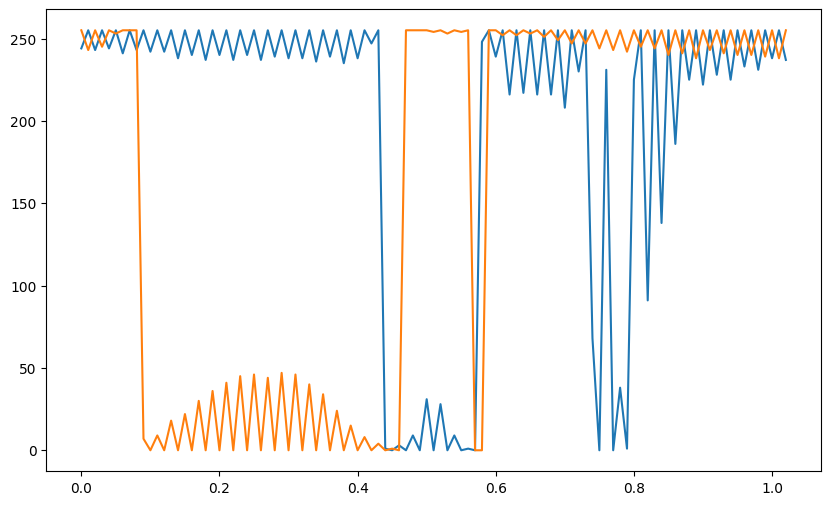

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 텍스트 파일 경로
input_file_path = 'hex_data.txt'

# 한 번에 읽어올 데이터 양 지정 (바이트 단위)
chunk_size = 1024

# 초당 100개의 샘플링 빈도
sampling_rate = 100

# 텍스트 파일 읽기
with open(input_file_path, 'r') as input_file:
    # 텍스트 파일에서 16진수 데이터 읽기
    hex_data = input_file.read(chunk_size).strip()

# 16진수를 10진수로 변환하여 리스트에 저장
decimal_data = [int(hex_data[i:i+2], 16) for i in range(0, len(hex_data), 2)]

# 초당 100개의 샘플로 데이터 분할
num_samples_per_second = len(decimal_data) // sampling_rate
data_split = np.array_split(decimal_data, num_samples_per_second)

# 시간 배열 생성
time = np.arange(0, len(data_split[0])) / sampling_rate

# 파형으로 데이터 시각화
plt.figure(figsize=(10, 6))
for i, data_segment in enumerate(data_split):
    plt.plot(time, data_segment, label=f'Segment {i+1}')

plt.title('Waveform of Data (100 Samples/Second)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()



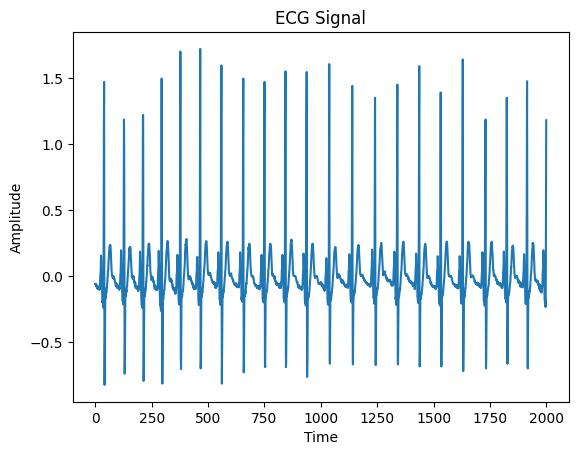

In [16]:
import wfdb
import matplotlib.pyplot as plt

# 데이터 파일과 헤더 파일의 경로 시각화시 메타데이터(hea)파일과 dat(심전도 신호)를 같이 사용
file_path = r'C:\Users\admin\Desktop\apnea\apnea-ecg-database-1.0.0\a01'

# 데이터 읽기
record = wfdb.rdrecord(file_path)

# 데이터 시각화
plt.plot(record.p_signal[:2000, 0])  # 첫 번째 신호의 처음 1000개 데이터를 시각화
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('ECG Signal')
plt.show()


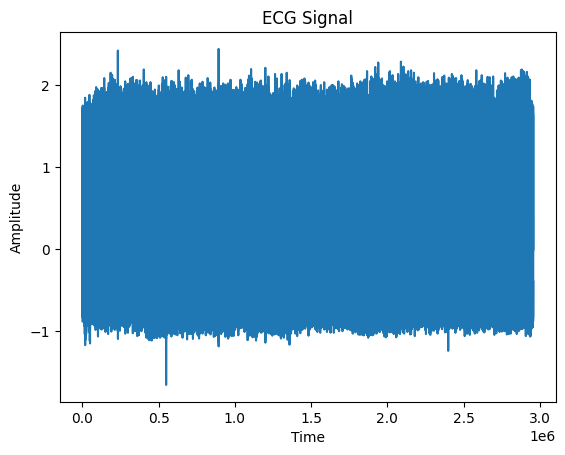

In [17]:
import wfdb
import matplotlib.pyplot as plt

# 데이터 파일과 헤더 파일의 경로 시각화시 메타데이터(hea)파일과 dat(심전도 신호)를 같이 사용
file_path = r'C:\Users\admin\Desktop\apnea\apnea-ecg-database-1.0.0\a01'

# 데이터 읽기
record = wfdb.rdrecord(file_path)

# 데이터 시각화
plt.plot(record.p_signal[:, 0])  # 첫 번째 신호의 처음 1000개 데이터를 시각화
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('ECG Signal')
plt.show()
